### Criando objetos MNE

## Executa script que prepara os dados

In [3]:
%run prepare.ipynb

Estruturas => dados (125, 257, 1205) labels (125,)
Características do voluntário: {'age': '37', 'capsize': 'Adult Small', 'gender': 'Male', 'hairtype': 'Regular', 'handedness': 'Right'}

Rótulos: {'1': 6.66, '2': 7.5, '3': 8.57, '4': 10.0, '5': 12.0}

Taxa de amostragem: 250


## Cria o objeto MNE

In [15]:
import mne
import matplotlib

montage = mne.channels.make_standard_montage('EGI_256')

obj = mne.create_info(montage.ch_names, sfreq=descriptor['sampling_rate'], ch_types='eeg')

obj.set_montage(montage)

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 256 EEG
 custom_ref_applied: False
 dig: 259 items (3 Cardinal, 256 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 256
 projs: []
 sfreq: 250.0 Hz
>

## Cria objeto `EpochsArray` com os dados dos eletrodos

In [11]:
# Remove o eletrodo de referência
X = X[:,:256,:]

events = np.array([[i, 0, e] for i, e in enumerate(y)])

epoch = mne.EpochsArray(X, obj, events=events)
epoch

125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<EpochsArray  |   125 events (all good), 0 - 4.816 sec, baseline off, ~294.8 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>

## Filtra eletrodos de interesse 

In [12]:
epoch = epoch.copy().pick_channels(['E116', 'E126', 'E150'])
epoch

(125, 256, 1205)
(125, 3, 1205)


## Filtra frequências abaixo e acima dos alvos

In [13]:
epoch.filter(l_freq = 5.0, h_freq = 14.0)

Setting up band-pass filter from 5 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 413 samples (1.652 sec)



<EpochsArray  |   125 events (all good), 0 - 4.816 sec, baseline off, ~3.6 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>

## Plota gráficos

Trial  0
    Using multitaper spectrum estimation with 7 DPSS windows


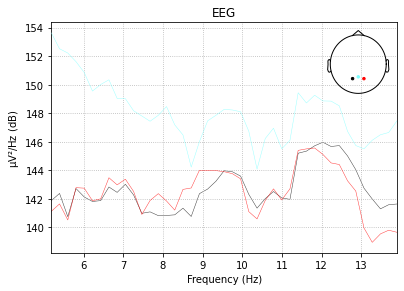

Trial  1
    Using multitaper spectrum estimation with 7 DPSS windows


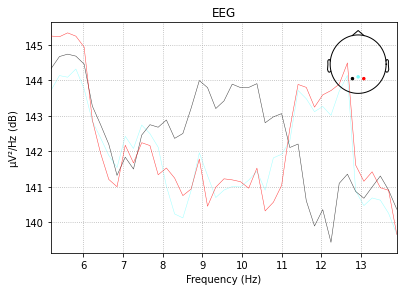

Trial  2
    Using multitaper spectrum estimation with 7 DPSS windows


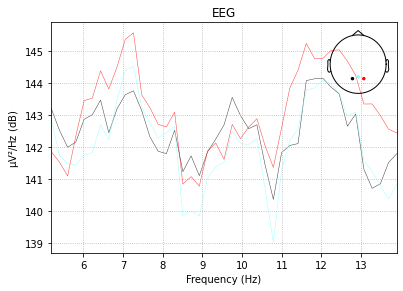

Trial  3
    Using multitaper spectrum estimation with 7 DPSS windows


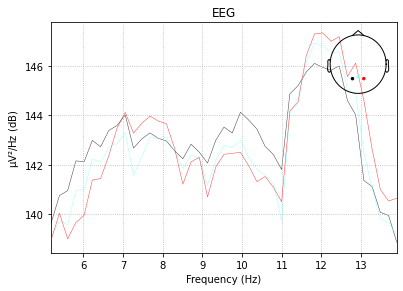

Trial  4
    Using multitaper spectrum estimation with 7 DPSS windows


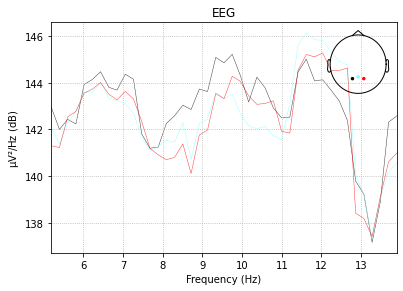

Trial  5
    Using multitaper spectrum estimation with 7 DPSS windows


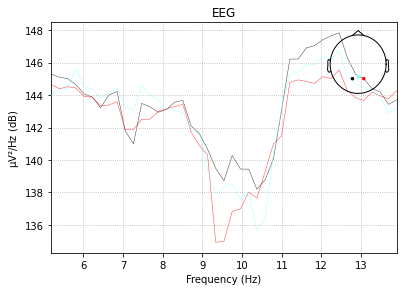

Trial  6
    Using multitaper spectrum estimation with 7 DPSS windows


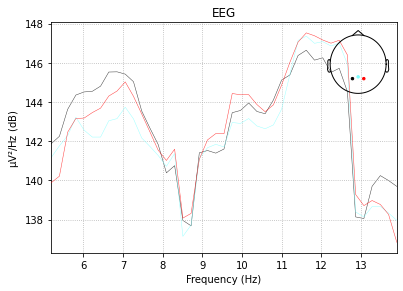

Trial  7
    Using multitaper spectrum estimation with 7 DPSS windows


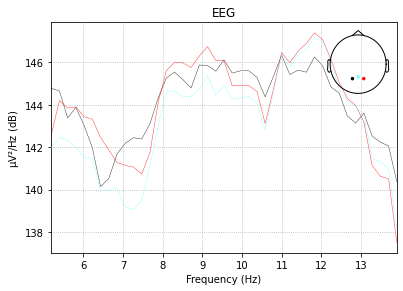

array([[  0,   0,   4],
       [  1,   0,   2],
       [  2,   0,   3],
       [  3,   0,   5],
       [  4,   0,   1],
       [  5,   0,   2],
       [  6,   0,   5],
       [  7,   0,   4],
       [  8,   0,   2],
       [  9,   0,   3],
       [ 10,   0,   1],
       [ 11,   0,   5],
       [ 12,   0,   4],
       [ 13,   0,   3],
       [ 14,   0,   2],
       [ 15,   0,   4],
       [ 16,   0,   1],
       [ 17,   0,   2],
       [ 18,   0,   5],
       [ 19,   0,   3],
       [ 20,   0,   4],
       [ 21,   0,   1],
       [ 22,   0,   3],
       [ 23,   0,   1],
       [ 24,   0,   3],
       [ 25,   0,   4],
       [ 26,   0,   2],
       [ 27,   0,   3],
       [ 28,   0,   5],
       [ 29,   0,   1],
       [ 30,   0,   2],
       [ 31,   0,   5],
       [ 32,   0,   4],
       [ 33,   0,   2],
       [ 34,   0,   3],
       [ 35,   0,   1],
       [ 36,   0,   5],
       [ 37,   0,   4],
       [ 38,   0,   3],
       [ 39,   0,   2],
       [ 40,   0,   4],
       [ 41,   0

In [75]:
for j in range(1, 5):
    for i in (0, len(epoch[str(j)])):
        print('Trial ', i)
        epoch[str(j)][-i].plot_psd(fmin=5.0, fmax=14.0)

events